In [10]:
import cv2
img = cv2.imread("./images/Fialaire_David.jpg", cv2.IMREAD_COLOR)
type(img)

numpy.ndarray

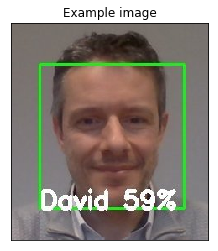

In [12]:
from matplotlib import pyplot as plt
import cv2
img = cv2.imread("./images/Fialaire_David.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
# without this we will see ticks like in a graph
plt.xticks([]), plt.yticks([])
plt.title("Example image")
plt.show()

In [13]:
from ipywebrtc import CameraStream, ImageRecorder
import PIL.Image
import PIL.ImageFilter
import io
import numpy as np

In [14]:
camera = CameraStream(constraints={'facing_mode': 'user','audio': False,'video': { 'width': 640, 'height': 480 }})


## Record images from the camera

In [15]:
image_recorder = ImageRecorder(stream=camera)
image_recorder

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'facing_mode': 'user', 'audio': False, …

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


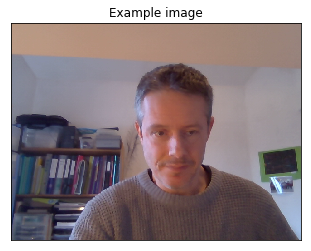

In [16]:
im = PIL.Image.open(io.BytesIO(image_recorder.image.value))
print(type(im))
im_array = np.array(im)
print(type(im_array))
#new_img = cv2.cvtColor(im_array, cv2.COLOR_RGB2BGR)

plt.imshow(im_array)
plt.xticks([]), plt.yticks([])
plt.title("Example image")
plt.show()

Clean

In [17]:
from ipywidgets import Widget
Widget.close_all()

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


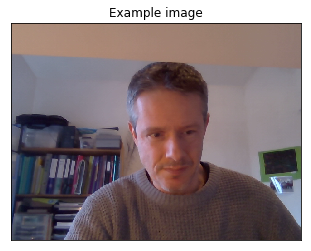

In [18]:
import io
import PIL.Image
import numpy as np
from ipywidgets import Image, VBox, HBox, Widget, Button
from IPython.display import display
from ipywebrtc import CameraStream, ImageRecorder

VIDEO_WIDTH = 640 # 窗口宽度，按需调整
VIDEO_HEIGHT = 480 # 窗口高度，按需调整

camera = CameraStream(constraints=
                      {'facing_mode': 'user',	
                       'audio': False,	
                       'video': { 'width': VIDEO_WIDTH, 'height': VIDEO_HEIGHT}	
                       })	# 另一种CameraStream创建方式，参考下文组件介绍部分
image_recorder = ImageRecorder(stream=camera)
out = Image(width=VIDEO_WIDTH, height=VIDEO_HEIGHT)

FLAG_STOP = False	# 终止标记

def cap_image(_):	# 处理ImageRecord抓取到的图片的过程
    if FLAG_STOP:
        return	# 停止处理
    im_in = PIL.Image.open(io.BytesIO(image_recorder.image.value))
    im_array = np.array(im_in)[..., :3]
    canvas = process(im_array)	# process是处理图像数组的函数，这里没写出来，各位按处理需要自己写即可
    ####
    canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    canvas = cv2.GaussianBlur(canvas, (5, 5), 0)
    ####
    im_out = PIL.Image.fromarray(canvas)
    f = io.BytesIO()
    im_out.save(f, format='png')
    out.value = f.getvalue()
    image_recorder.recording = True	# 重新设置属性，使ImageRecorder继续抓取

# 注册抓取事件，参考我另一篇Blog：https://qxsoftware.blog.csdn.net/article/details/86708381

#image_recorder.image.observe(cap_image, names=['value'])

# 用于停止抓取的按钮
btn_stop = Button(description="Capture",
                  tooltip='click this to stop webcam',
                  button_style='danger')
# btn_stop的处理函数
def close_cam(_):
    FLAG_STOP= True
    Widget.close_all()
    im = PIL.Image.open(io.BytesIO(image_recorder.image.value))
    print(type(im))
    im_array = np.array(im)
    print(type(im_array))
    #new_img = cv2.cvtColor(im_array, cv2.COLOR_RGB2BGR)

    plt.imshow(im_array)
    plt.xticks([]), plt.yticks([])
    plt.title("Example image")
    plt.show()
    
    
btn_stop.on_click(close_cam) # 注册单击事件
# Run this section and Press the Camera button to display demo
display(VBox([HBox([camera,  ]), btn_stop, image_recorder]))   #  btn_stop]), out]))
